<a href="https://colab.research.google.com/github/aquapathos/openCVLesson/blob/master/IP/%E8%86%A8%E5%BC%B5%E3%83%BB%E5%8F%8E%E7%B8%AE%E5%87%A6%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ２値画像の膨張・収縮
## **目的**

　実際の画像に対して２値の膨張・収縮処理を行い、その基本的性質を理解しましょう。

## **基本的な膨張・収縮処理**

- 膨張処理  
- 収縮処理  
- 膨張収縮によるノイズ除去  

　このそれぞれに
- ８近傍処理
- ４近傍処理  

があり、結果は違ってくる。

**膨張収縮によるノイズ除去**は、

- 膨張後収縮
- 収縮後膨張

のバリエーションがある。

## **課題**

- 用意されたプログラムを用いて、上に挙げた各処理を行い、各処理についての、８近傍処理と４近傍処理の結果の違いを観察し、その性質について考察する。  
- ノイズ除去の実験については、膨張・収縮の処理回数をさまざまに変えてみて、自分の選んだ入力画像の場合の最適な組み合わせを探す。最適な組み合わせとその他いくつかの結果を報告する。

<font color=red size=2>　課題内容にふさわしい処理対象画像を用意して実験を行うこと。適当に作ったら考察がやりにくくなる。違いが観察しやすくなるような画像を選ぶセンスが重要。</font>

## **レポート**

- 実験結果の報告（画像だけのレポートは不可。きちんと文書化すること）
- 上の課題で上げた考察をきちんと記述すること。

## **実験要領**

#### 処理対象画像の準備

- ２値画像処理ですから、白黒の画像でないといけません。
- あまり複雑だと４近傍処理と８近傍処理の違いが分かりにくいので、比較的単純な図形の方がよい。
- ペイントソフトで作るか、白黒のアイコンなどのフリー素材（[例](https://icooon-mono.com/) )の中から選ぶとよいでしょう。
- 背景が白であることが前提となっています。逆の場合は、アップロード時に、**反転** させることができます。

なお、入力画像は  256x256 にリサイズされます。

#### <font color=orange>実験手順についての注意</font>

- 最初は何もいじらずに、説明を読みながら最後まで実行し、実験内容を把握してください。
- 実験レポートには、自分で作った（選んだ）画像を使って実行した結果を使ってください。
- プログラムには依存関係があります。上から順に実行することが前提となっています。途中を飛ばして実行することはできません。（結果が出ても、前提がくるっているので、正しい結果ではありません）






In [0]:
import urllib.request
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files

# url = "https://user-images.githubusercontent.com/5820803/81074733-6556bf80-8f24-11ea-87c8-937e09b417ac.jpg" # cross

# 処理対象画像の入力

![twoway](https://user-images.githubusercontent.com/5820803/81167986-22065a80-8fd1-11ea-8f3a-817b982afdf2.png)

次のセルの実行で処理対象画像を入力します。

入力方法を３とおり用意してあります。

1. URL指定
2. 即時アップロード  
3. 事前アップロード

#### **1. URL指定による画像入力**

スマートフォンの場合、機種によってはブラウザの機能不足でプログラム中のアップロード機能はつかえませんので、URL指定の方を使いまる。ファイル名は図のキャプションで使われるだけですので、任意の名前を記入してください。

![unnamed](https://user-images.githubusercontent.com/5820803/81169123-44997300-8fd3-11ea-820f-d7c3f8826b64.jpg)

　↑　スマートフォンでの実行画面




スマートフォンでのURL指定の例　→　　https://youtu.be/ajhG5NC41i0


#### **2. 即時アップロード**

ペイントソフト等で作った画像を使う場合や、パソコン内にある白黒画像を処理対象にする場合は、「即時アップロード」か「事前アップロード」を選んでください。


「即時アップロード」を選んで実行すると、「ファイル選択」ボタンが表示されるので、すかさず処理対象画像をアップロードしてください。 

　画像ファイル名として、アップロードしたファイル名が使われます。


#### **3. 事前アップロード**

　左のブラウズエリアで、事前に画像ファイルをアップロードしておく方法です。

【事前アップロード方法】

1. 左上の　≡　のところをクリック（タップ）する。PCの場合は、フォルダアイコンをクリック、スマートフォンの場合は、メニューから、「ファイルブラウザの表示」を選ぶ。    
2.「アップロード」を選び、画像ファイルをアップロードする。    
3. 次のセルで、画像入力方法として、「事前アップロード」を選び、アップロードしたファイル名を正しく記入する。URLは無視される。


(スマホ対応情報)
- iOS は事前アップロードはできますが、即時アップロードができないようです。 (iOS 13.3.1 Chrome で確認）   
- Anndroid は３つの入力方法すべて使えることを確認しました。(android 9.0 Chrome で確認）


**注意**

初めから入力されている URL はサンプル画像 cross.png のURLが記入されています。

最初は変更せずにそのまま最後まで実行してみてください。




## 処理対象画像の前提

<font color=red>背景が白、対象が黒であることを前提としています。

背景が黒の場合は、**反転** にチェックを入れてセルを実行してください。></font>

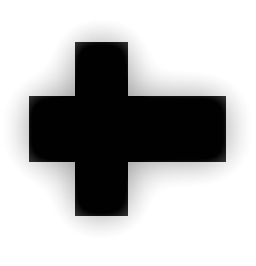

図A-1　cross.jpg


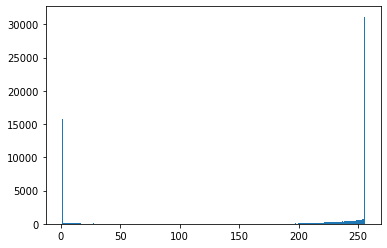

図A-2　coss.jpg のヒストグラム


In [2]:
# 処理対象画像の指定
画像入力方法 = "URL\u6307\u5B9A"  #@param ["アップロード","事前アップロード", "URL指定"]
url="https://bit.ly/3frmgPm" #@param {type:"string"}
ファイル名を入力してください="cross.png" #@param {type:"string"}
if 画像入力方法 == "アップロード":
  filename = list(files.upload())[0]
  img = cv2.imread(filename,1) # カラーで読み込み
elif 画像入力方法 == "事前アップロード":
  filename = ファイル名を入力してください
  img = cv2.imread(filename,1) # カラーで読み込み
else: # URLからのダウンロード
  img_path, header = urllib.request.urlretrieve(url)
  img = cv2.imread(img_path,1)  
  filename = ファイル名を入力してください
反転 = False #@param {type:"boolean", min:1, max:30, step:1}
gry = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # グレイスケールに変換
if 反転:
  gry = 255-gry
gry = cv2.resize(gry,(256,256)) # 256x256にリサイズ
cv2_imshow(img)
print("図A-1　cross.jpg")
hist = cv2.calcHist([gry],[0],None,[256],[0,256])
plt.hist(gry.ravel(),256,[0,256]); plt.show()
print("図A-2　coss.jpg のヒストグラム")

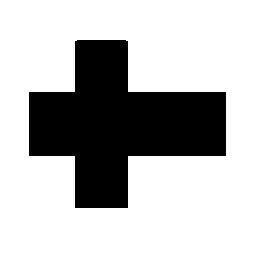

図A-3　coss.jpg を判別分析法によるしきい値 124.0 で２階調化した画像


In [3]:
# ２階調化
ret, bw = cv2.threshold(gry,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow(bw)
print("図A-3　coss.jpg を判別分析法によるしきい値 {} で２階調化した画像".format(ret))

# 実験対象画像の生成

1. 上記２値画像のマージンを増やした画像
2. 45度回転した画像
3. ノイズを加えた画像

を生成する。

マージンを増やすのは、回転時と膨張処理時に図形が表示領域外に出る可能性があるため。

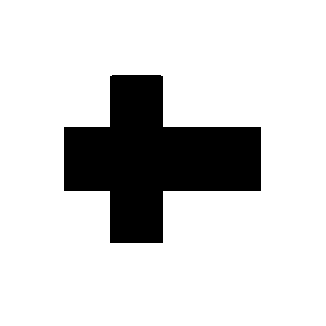

図A-4　マージンを増した２値画像


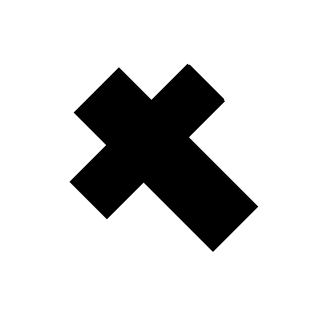

図A-5　45度回転した画像


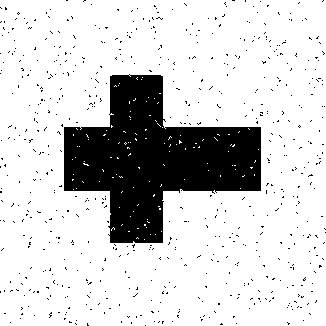

図A-6　ノイズを加えた画像


In [4]:
NNoise = 1000 # ノイズの個数
Margin = 70

def 実験用画像生成(bw):
    # 画像の高さと幅
    height = bw.shape[0]                         
    width = bw.shape[1]  

    # 余白を増やす
    timg = 255*np.ones((height+Margin,width+Margin)) # 真っ白の画像
    HM = Margin//2
    timg[HM:HM+height,HM:HM+width] = bw # 背景が白なので白黒反転

    # 中心                          
    center = (width//2+HM, height//2+HM)
    # 回転行列を作成
    rmatrix = cv2.getRotationMatrix2D(center, -45.0 , 1.0)
    #アフィン変換で４５度回転した画像を作成
    bw45 = (255-cv2.warpAffine(255-timg, rmatrix,(width+Margin,height+Margin)))

    # ノイズ画像の生成
    nbw = timg.copy()
    pts_x = np.random.randint(0, width+Margin-1 , NNoise) # 0から(col-1)までの乱数をNNoise個作る
    pts_y = np.random.randint(0, height+Margin-1 , NNoise)
    for n in range(NNoise):
      x = pts_x[n]
      y = pts_y[n]
      for i in range(np.random.randint(0, 5)):
        rx = np.random.randint(-1, 2)
        ry = np.random.randint(-1, 2)
        x = x if x + rx < 0 or x + rx >= width+Margin else x + rx
        y = y if y + ry < 0 or y + ry >= height+Margin else y + ry
        nbw[y,x] = 255-nbw[y,x] # 反転する

    return timg,bw45,nbw

bw0,bw45,nbw = 実験用画像生成(bw)

cv2_imshow(bw0)
print("図A-4　マージンを増した２値画像")

cv2_imshow(bw45)
print("図A-5　45度回転した画像")

cv2_imshow(nbw)
print("図A-6　ノイズを加えた画像")

# 実験１　膨張処理

収縮はErosion，膨張はDilationであるが，opencv では，図が白，地が黒であることが前提のネーミングとなっている．
ここでは図が黒，地が白であるので，膨張と収縮が逆になることに注意せよ．


## 実験１－１  　８近傍の膨張

下のプログラムは、膨張処理を指定回数繰り返し実行するプログラムである。

デフォルトは10回としてあるが、任意の回数に変更できる。

繰り返し回数により、結果は変わるので、レポートには必ず回数を記述すること。

なお、背景がまっ白だと境界が分かりにくいのでわざと暗く表示している。


### 10回繰り返し

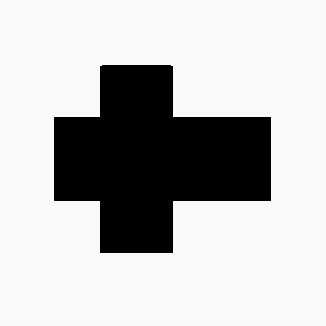

図A-7　cross の 10回膨張　８近傍処理


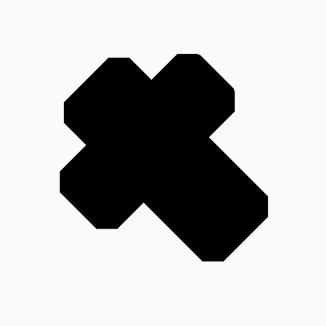

図A-8　45度回転画像 の 10回膨張　８近傍処理


In [5]:
繰り返し回数 = 10 #@param {type:"slider", min:1, max:30, step:1}
neiborhood8 = np.ones((3,3),np.uint8)
dilation8 = cv2.erode(bw0,neiborhood8,iterations = 繰り返し回数 )
dilation8r45 = cv2.erode(bw45,neiborhood8,iterations = 繰り返し回数 )
cv2_imshow(250*(dilation8/255))
print("図A-7　cross の {}回膨張　８近傍処理".format(繰り返し回数 ))
cv2_imshow(250*(dilation8r45/255))
print("図A-8　45度回転画像 の {}回膨張　８近傍処理".format(繰り返し回数))

### 25回繰り返し

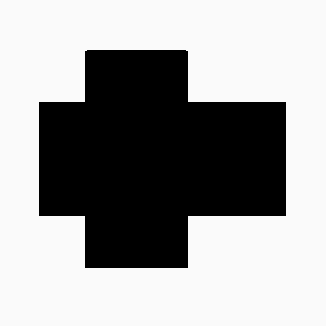

図A-9　cross の 25回膨張 ８近傍処理


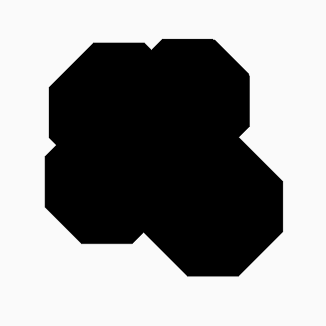

図A-10　45度回転画像 の 25回膨張　８近傍処理


In [6]:
itt = 25 #@param {type:"slider", min:1, max:30, step:1}
neiborhood8 = np.ones((3,3),np.uint8)
dilation8 = cv2.erode(bw0,neiborhood8,iterations = itt)
dilation8r45 = cv2.erode(bw45,neiborhood8,iterations = itt)
cv2_imshow(250*(dilation8/255))
print("図A-9　cross の {}回膨張 ８近傍処理".format(itt))
cv2_imshow(250*(dilation8r45/255))
print("図A-10　45度回転画像 の {}回膨張　８近傍処理".format(itt))

### 徐々に膨張回数を増やして変化の様子を観測してみる（８近傍膨張処理）

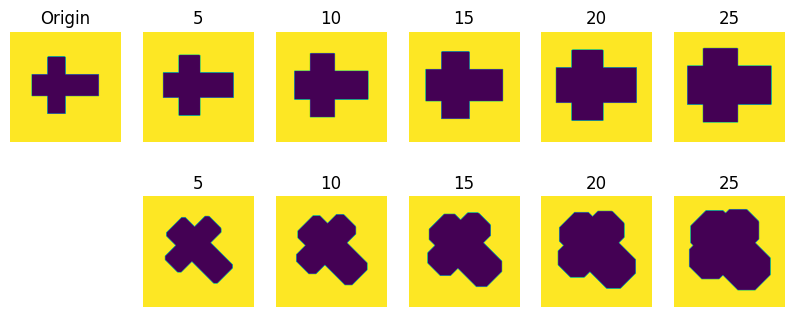

In [7]:
def stepuperode8(bw,bw45):
    plt.figure(figsize=(10, 4), dpi=100)
    neiborhood8 = np.ones((3,3),np.uint8)
    plt.subplot(2,6,1)
    plt.imshow(bw)
    plt.title("Origin")
    plt.axis('off')
    for i in range(1, 6):
        dilation8 = cv2.erode(bw,neiborhood8,iterations = i*5 )
        plt.subplot(2, 6, i+1)
        plt.title(str(5*i))
        plt.imshow(dilation8)
        plt.axis('off')
        dilation8r45 = cv2.erode(bw45,neiborhood8,iterations = i*5)
        plt.subplot(2, 6, 6+i+1)
        plt.title(str(5*i))
        plt.imshow(dilation8r45)
        plt.axis('off')

stepuperode8(bw0,bw45)


 　　　　　　　　　　　　　図A-11　膨張回数を段階的に増やしていった場合の結果観察（８近傍膨張処理 )


## 実験１ー２  ４近傍膨張
### 10回繰り返し

※　８近傍処理との比較のため、繰り返し回数は同じにすること。

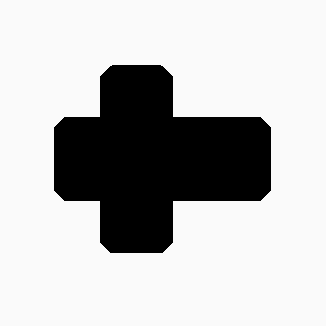

図A-12　cross の 10回膨張　４近傍処理


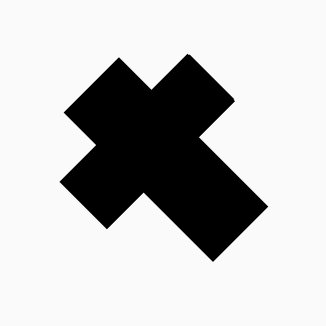

図A-13　45度回転画像 の 10回膨張　４近傍処理


In [8]:
itt = 10 #@param {type:"slider", min:1, max:30, step:1}
neiborhood4 = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]],np.uint8)
dilation4 = cv2.erode(bw0,neiborhood4,iterations = itt)
dilation4r45 = cv2.erode(bw45,neiborhood4,iterations = itt)
cv2_imshow(250*(dilation4/255))
print("図A-12　cross の {}回膨張　４近傍処理".format(itt))
cv2_imshow(250*(dilation4r45/255))
print("図A-13　45度回転画像 の {}回膨張　４近傍処理".format(itt))

### 25回繰り返し

※　８近傍処理との比較のため、繰り返し回数は同じにすること。

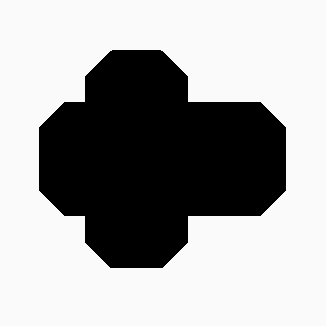

図A-14　cross の 25回膨張　４近傍処理


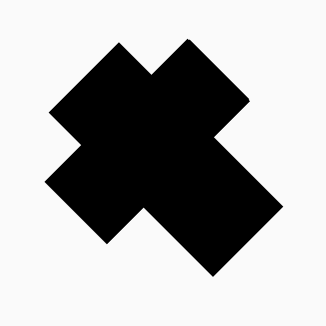

図A-15　45度回転画像 の 25回膨張　４近傍処理


In [9]:
itt = 25 #@param {type:"slider", min:1, max:30, step:1}
neiborhood4 = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]],np.uint8)
dilation4 = cv2.erode(bw0,neiborhood4,iterations = itt)
dilation4r45 = cv2.erode(bw45,neiborhood4,iterations = itt)
cv2_imshow(250*(dilation4/255))
print("図A-14　cross の {}回膨張　４近傍処理".format(itt))
cv2_imshow(250*(dilation4r45/255))
print("図A-15　45度回転画像 の {}回膨張　４近傍処理".format(itt))

### 徐々に膨張回数を増やして変化の様子を観測してみる（４近傍膨張処理）

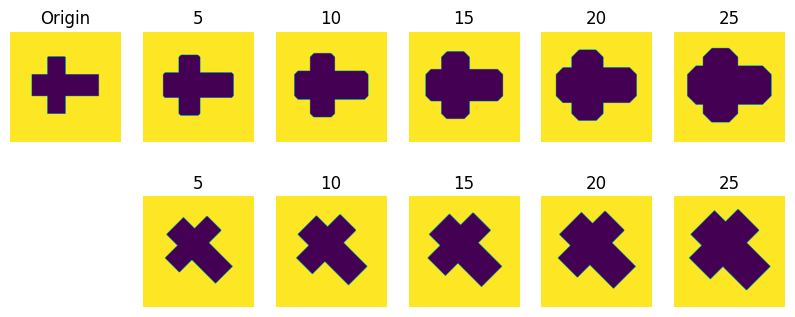

In [10]:
def stepuperode4(bw,bw45):
    plt.figure(figsize=(10, 4), dpi=100)
    plt.subplot(2,6,1)
    plt.imshow(bw)
    plt.title("Origin")
    plt.axis('off')
    for i in range(1, 6):
        dilation4 = cv2.erode(bw,neiborhood4,iterations = i*5 )
        plt.subplot(2, 6, i+1)
        plt.title(str(5*i))
        plt.imshow(dilation4)
        plt.axis('off')
        dilation4r45 = cv2.erode(bw45,neiborhood4,iterations = i*5)
        plt.subplot(2, 6, 6+i+1)
        plt.title(str(5*i))
        plt.imshow(dilation4r45)
        plt.axis('off')

stepuperode4(bw0,bw45)

 　　　　　　　　　　　　　図A-16　膨張回数を段階的に増やしていった場合の結果観察（４近傍膨張処理 )

# 実験２　収縮処理

## 実験２－１　8近傍収縮

### 10回収縮

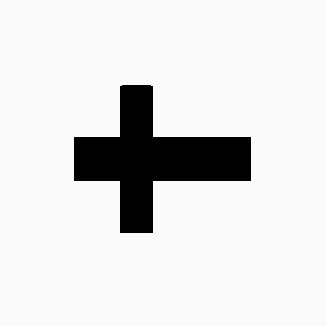

図A-17　cross の 10回収縮　８近傍処理


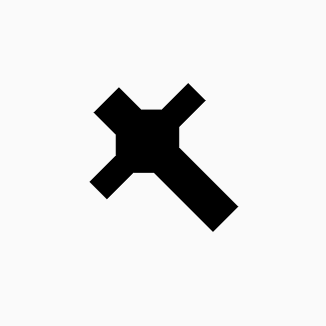

図A-18　45度回転画像 の 10回収縮　８近傍処理


In [11]:
itt = 10 #@param {type:"slider", min:1, max:30, step:1}
neiborhood8 = np.ones((3,3),np.uint8)
erosion8 = cv2.dilate(bw0,neiborhood8,iterations = itt)
erosion8r45 = cv2.dilate(bw45,neiborhood8,iterations = itt)
cv2_imshow(250*(erosion8/255))
print("図A-17　cross の {}回収縮　８近傍処理".format(itt))
cv2_imshow(250*(erosion8r45/255))
print("図A-18　45度回転画像 の {}回収縮　８近傍処理".format(itt))

### 25回収縮

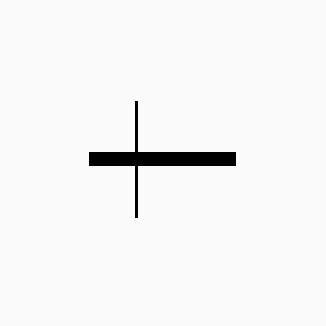

図A-19　cross の 25回収縮　８近傍処理


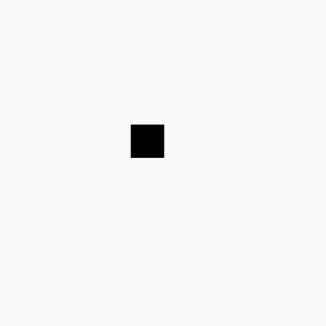

図A-20　45度回転画像 の 25回収縮　８近傍処理


In [12]:
itt = 25 #@param {type:"slider", min:1, max:30, step:1}
neiborhood8 = np.ones((3,3),np.uint8)
erosion8 = cv2.dilate(bw0,neiborhood8,iterations = itt)
erosion8r45 = cv2.dilate(bw45,neiborhood8,iterations = itt)
cv2_imshow(250*(erosion8/255))
print("図A-19　cross の {}回収縮　８近傍処理".format(itt))
cv2_imshow(250*(erosion8r45/255))
print("図A-20　45度回転画像 の {}回収縮　８近傍処理".format(itt))

### 徐々に収縮回数を増やして変化の様子を観測してみる（８近傍収縮処理）

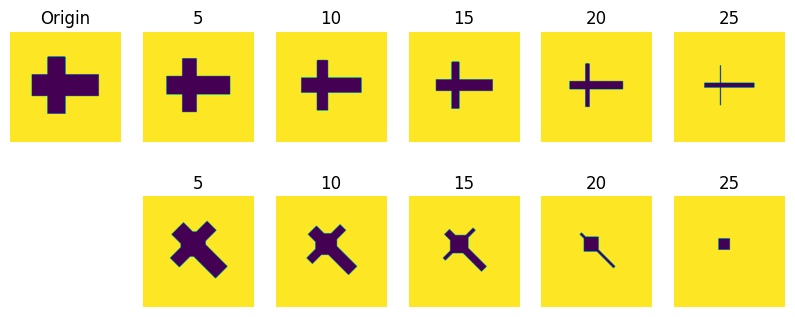

In [13]:
def stepupdilate8(bw,bw45):
    plt.figure(figsize=(10, 4), dpi=100)
    neiborhood8 = np.ones((3,3),np.uint8)
    plt.subplot(2,6,1)
    plt.imshow(bw)
    plt.title("Origin")
    plt.axis('off')
    for i in range(1, 6):
        erosion8 = cv2.dilate(bw,neiborhood8,iterations = i*5 )
        plt.subplot(2, 6, i+1)
        plt.title(str(5*i))
        plt.imshow(erosion8)
        plt.axis('off')
        erosion8r45 = cv2.dilate(bw45,neiborhood8,iterations = i*5)
        plt.subplot(2, 6, 6+i+1)
        plt.title(str(5*i))
        plt.imshow(erosion8r45)
        plt.axis('off')

stepupdilate8(bw0,bw45)



---

　　　　　　　　　図A-21　収縮回数を段階的に増やしていった場合の結果観察（８近傍収縮 )

## 実験２－２　　４近傍収縮

### 10回収縮

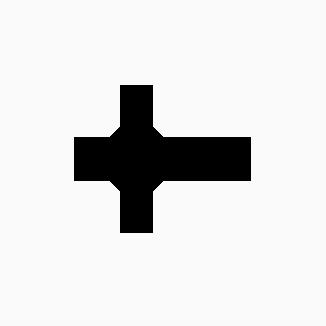

図A-22　cross の 10回収縮　４近傍処理


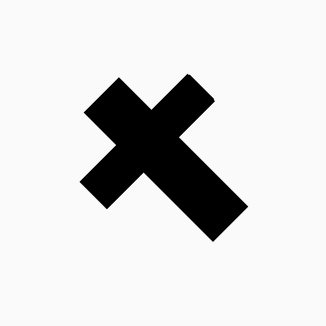

図A-23　45度回転画像 の 10回収縮　４近傍処理


In [14]:
itt = 10 #@param {type:"slider", min:1, max:30, step:1}
neiborhood4 = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]],np.uint8)
erosion4 = cv2.dilate(bw0,neiborhood4,iterations = itt)
erosion4r45 = cv2.dilate(bw45,neiborhood4,iterations = itt)
cv2_imshow(250*(erosion4/255))
print("図A-22　cross の {}回収縮　４近傍処理".format(itt))
cv2_imshow(250*(erosion4r45/255))
print("図A-23　45度回転画像 の {}回収縮　４近傍処理".format(itt))

### 25回収縮

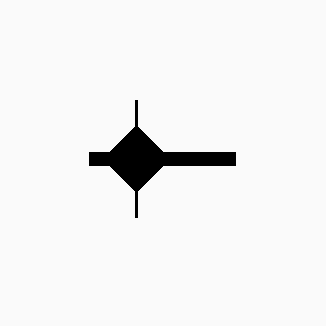

図A-24　cross の 25回収縮　４近傍処理


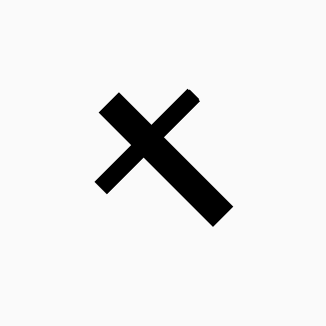

図A-25　45度回転画像 の 25回収縮　４近傍処理


In [15]:
itt = 25 #@param {type:"slider", min:1, max:30, step:1}
neiborhood4 = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]],np.uint8)
erosion4 = cv2.dilate(bw0,neiborhood4,iterations = itt)
erosion4r45 = cv2.dilate(bw45,neiborhood4,iterations = itt)
cv2_imshow(250*(erosion4/255))
print("図A-24　cross の {}回収縮　４近傍処理".format(itt))
cv2_imshow(250*(erosion4r45/255))
print("図A-25　45度回転画像 の {}回収縮　４近傍処理".format(itt))

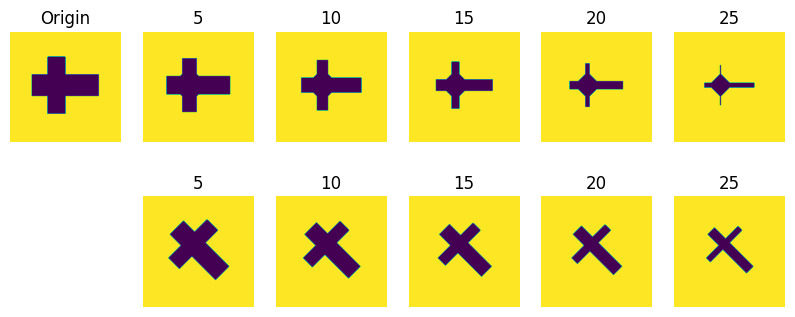

In [16]:
def stepupdilate4(bw,bw45):
    plt.figure(figsize=(10, 4), dpi=100)
    neiborhood4 = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]],np.uint8)
    plt.subplot(2,6,1)
    plt.imshow(bw)
    plt.title("Origin")
    plt.axis('off')
    for i in range(1, 6):
        erosion4 = cv2.dilate(bw,neiborhood4,iterations = i*5 )
        plt.subplot(2, 6, i+1)
        plt.title(str(5*i))
        plt.imshow(erosion4)
        plt.axis('off')
        erosion4r45 = cv2.dilate(bw45,neiborhood4,iterations = i*5)
        plt.subplot(2, 6, 6+i+1)
        plt.title(str(5*i))
        plt.imshow(erosion4r45)
        plt.axis('off')

stepupdilate4(bw0,bw45)

　　　　　　　　　　　　　図A-26　収縮回数を段階的に増やしていった場合の結果観察（４近傍収縮 )

# 実験３　　膨張収縮によるノイズ除去

<font color=red>膨張回数と収縮回数を変えるとどうなるか試しましょう。

一番うまくノイズが消える組み合わせを報告してください。</font>

## 実験３－１　膨張後収縮 
### ８近傍処理

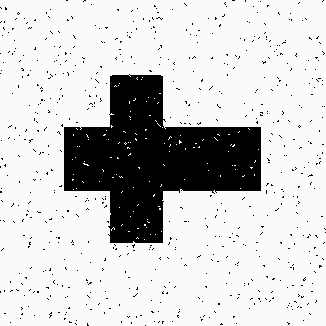

　　　　　図A-27　ノイズ除去前画像


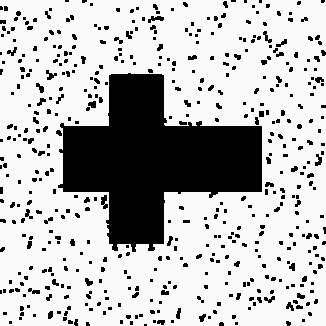

　　　　　図A-28　1回膨張後（８近傍処理）


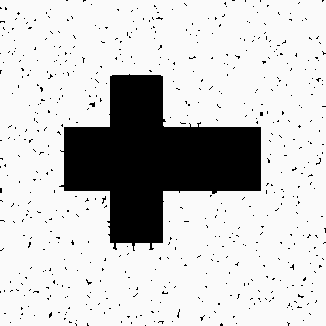

　　　　　図A-29　1回収縮後（８近傍処理）


In [17]:
膨張回数 = 1 #@param {type:"slider", min:1, max:10, step:1}
収縮回数 = 1 #@param {type:"slider", min:1, max:10, step:1}

cv2_imshow(250*(nbw/255))
print("　　　　　図A-27　ノイズ除去前画像")
dilation8 = cv2.erode(nbw,neiborhood8,iterations = 膨張回数 )
cv2_imshow(250*(dilation8/255))
print("　　　　　図A-28　{}回膨張後（８近傍処理）".format(膨張回数))
erode8 = cv2.dilate(dilation8,neiborhood8,iterations = 収縮回数 )
cv2_imshow(250*(erode8/255))
print("　　　　　図A-29　{}回収縮後（８近傍処理）".format(収縮回数))

### ４近傍処理


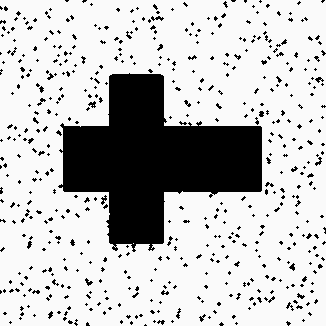

　　　　　図A-30　1回膨張後（４近傍処理）


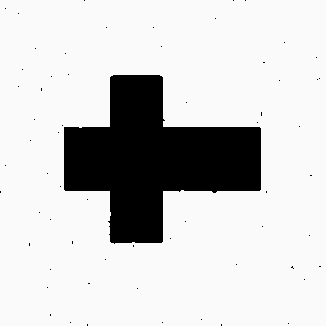

　　　　　図A-31　1回収縮後（４近傍処理）


In [18]:
膨張回数 = 1 #@param {type:"slider", min:1, max:10, step:1}
収縮回数 = 1 #@param {type:"slider", min:1, max:10, step:1}

dilation4 = cv2.erode(nbw,neiborhood4,iterations = 膨張回数 )
cv2_imshow(250*(dilation4/255))
print("　　　　　図A-30　{}回膨張後（４近傍処理）".format(膨張回数))
erode4 = cv2.dilate(dilation4,neiborhood8,iterations = 収縮回数 )
cv2_imshow(250*(erode4/255))
print("　　　　　図A-31　{}回収縮後（４近傍処理）".format(収縮回数))

## 実験３－２　収縮後膨張 
### ８近傍処理


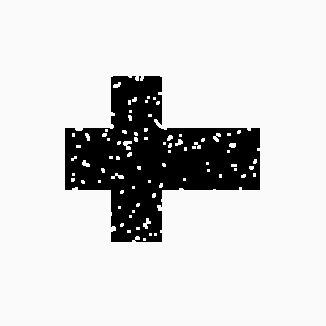

　　　　　図A-32　1回収縮後（８近傍処理）


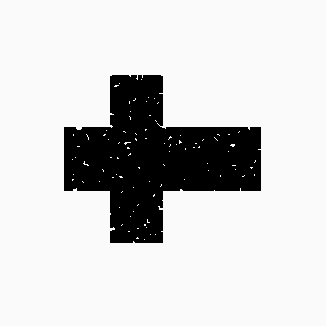

　　　　　図A-33　1回膨張後（８近傍処理）


In [19]:
収縮回数 = 1 #@param {type:"slider", min:1, max:10, step:1}
膨張回数 = 1 #@param {type:"slider", min:1, max:10, step:1}

erode8 = cv2.dilate(nbw,neiborhood8,iterations = 収縮回数 )
cv2_imshow(250*(erode8/255))
print("　　　　　図A-32　{}回収縮後（８近傍処理）".format(収縮回数))
dilation8 = cv2.erode(erode8,neiborhood8,iterations = 膨張回数 )
cv2_imshow(250*(dilation8/255))
print("　　　　　図A-33　{}回膨張後（８近傍処理）".format(膨張回数))

### ４近傍処理


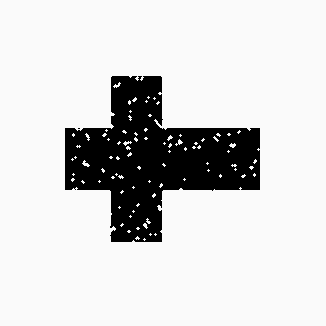

　　　　　図A-34　1回収縮後（４近傍処理）


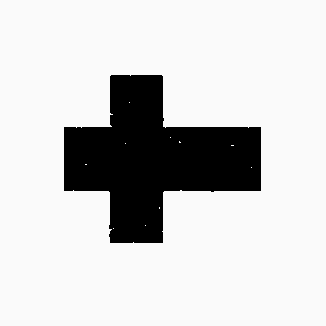

　　　　　図A-35　1回膨張後（４近傍処理）


In [20]:
収縮回数 = 1 #@param {type:"slider", min:1, max:10, step:1}
膨張回数 = 1 #@param {type:"slider", min:1, max:10, step:1}

erode4 = cv2.dilate(nbw,neiborhood4,iterations = 収縮回数 )
cv2_imshow(250*(erode4/255))
print("　　　　　図A-34　{}回収縮後（４近傍処理）".format(収縮回数))
dilation4 = cv2.erode(erode4,neiborhood8,iterations = 膨張回数 )
cv2_imshow(250*(dilation4/255))
print("　　　　　図A-35　{}回膨張後（４近傍処理）".format(膨張回数))

# <font color=red>**☆☆　ここまで　☆☆**</font>



---



---



---



# 参考

以下は課題ではありませんが、考察の参考になると思いますので、実行してみてください。

円ならどうなるか？

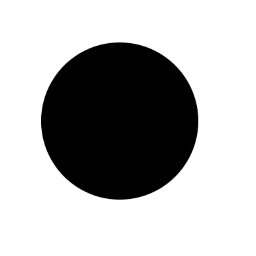

図参-1　ある円の画像


In [21]:
url = "https://user-images.githubusercontent.com/5820803/81076832-1cecd100-8f27-11ea-9743-cf76aefbd9b2.png" # circle
img_path, header = urllib.request.urlretrieve(url)
imgC = cv2.imread(img_path,1) #  画像の読み込み
gryC =  cv2.imread(img_path,0)
cv2_imshow(imgC)
print("図参-1　ある円の画像")
histC = cv2.calcHist([gryC],[0],None,[256],[0,256])
# plt.hist(gryC.ravel(),256,[0,256]); plt.show()
# print("図参-2　上の画像のヒストグラム")
# ２階調化
retC, bwC = cv2.threshold(gryC,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# cv2_imshow(bwC)
# print("図参-3　円の画像を判別分析法によるしきい値 {} で２階調化した画像".format(retC))

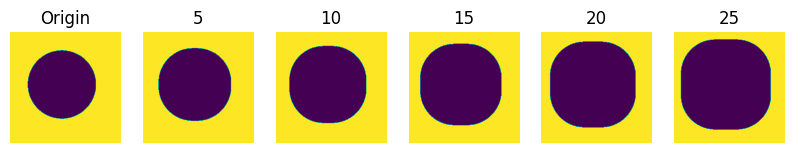

In [22]:
plt.figure(figsize=(10, 4), dpi=100)
neiborhood8 = np.ones((3,3),np.uint8)
plt.subplot(1,6,1)
plt.imshow(bwC)
plt.title("Origin")
plt.axis('off')
for i in range(1, 6):
    dilate8 = cv2.erode(bwC,neiborhood8,iterations = i*5 )
    plt.subplot(1, 6, i+1)
    plt.title(str(5*i))
    plt.imshow(dilate8)
    plt.axis('off')

　　　　　　　　　　　　　図参-2　膨張回数を段階的に増やしていった場合の結果観察（８近傍膨張）

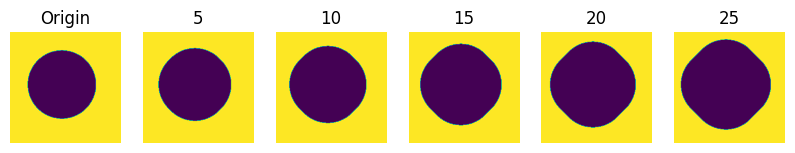

In [23]:
plt.figure(figsize=(10, 4), dpi=100)
neiborhood4 = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]],np.uint8)
plt.subplot(1,6,1)
plt.imshow(bwC)
plt.title("Origin")
plt.axis('off')
for i in range(1, 6):
    dilate4 = cv2.erode(bwC,neiborhood4,iterations = i*5 )
    plt.subplot(1, 6, i+1)
    plt.title(str(5*i))
    plt.imshow(dilate4)
    plt.axis('off')

　　　　　　　　　　　　　図参-3　膨張回数を段階的に増やしていった場合の結果観察（４近傍膨張）

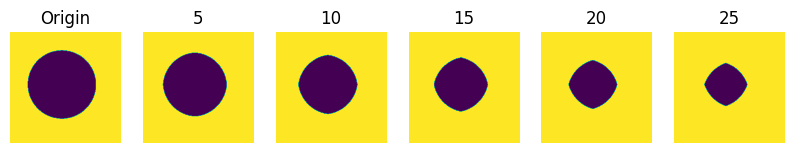

In [24]:
plt.figure(figsize=(10, 4), dpi=100)
neiborhood8 = np.ones((3,3),np.uint8)
plt.subplot(1,6,1)
plt.imshow(bwC)
plt.title("Origin")
plt.axis('off')
for i in range(1, 6):
    erosion8 = cv2.dilate(bwC,neiborhood8,iterations = i*5 )
    plt.subplot(1, 6, i+1)
    plt.title(str(5*i))
    plt.imshow(erosion8)
    plt.axis('off')

　　　　　　　　　　　　　図参-4　収縮回数を段階的に増やしていった場合の結果観察（８近傍収縮）

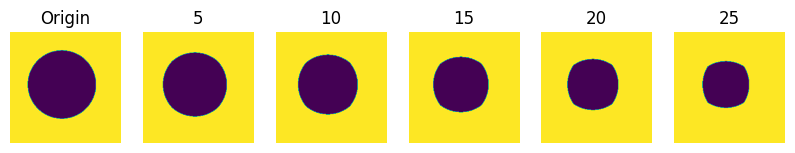

In [25]:
plt.figure(figsize=(10, 4), dpi=100)
neiborhood4 = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]],np.uint8)
plt.subplot(1,6,1)
plt.imshow(bwC)
plt.title("Origin")
plt.axis('off')
for i in range(1, 6):
    erosion4 = cv2.dilate(bwC,neiborhood4,iterations = i*5 )
    plt.subplot(1, 6, i+1)
    plt.title(str(5*i))
    plt.imshow(erosion4)
    plt.axis('off')

　　　　　　　　　　　　　図参-5　収縮回数を段階的に増やしていった場合の結果観察（４近傍収縮）